In [1]:
import gedsk

In [2]:
import pandas as pd
import numpy as np

In [3]:
#filename = r"D:\Codes\AllSamples\N-g127975.00430\g127975.00430"
#filename = r"D:\Codes\AllSamples\nstx_132588_00650_v2\g132588.00650"
#filename = r"C:\Users\fuadh\Downloads\1_g_p45091_t0.40000\g_p45091_t0.40000"
#filename = r"D:\Codes\AllSamples\WEST_20230714\geqdsk_55799_3.5_301x301"
#filename = "geqdsks/80MW_equilibrium.geqdsk"
filename = r"C:\Users\fuadh\Downloads\geqdskV2-FreeGS-20200401"
data = gedsk.read_gedsk(filename)
psi = gedsk.get_psi(data)

In [4]:
bounds = gedsk.get_bounds(data)
x, y = gedsk.get_xy(data)
spline = gedsk.get_spline_for_psi(psi, x, y)
#all_critical_points = gedsk.find_all_critical_points(spline, bounds, nx=50, ny=50)

In [5]:
#root = gedsk.find_critical_point_using_root(spline, 6, 0, method='hybr')

In [6]:
all_critical_points = gedsk.find_all_critical_points_using_root(spline, bounds,nx=20, ny=20, method='hybr')
all_critical_points

{(0.6121715065261123, -1.7956296192233494),
 (0.6247812433632787, 3.529545135735609e-07),
 (0.7135441512775317, -1.8788391430124474),
 (0.7146485744890891, 1.8791860953846318),
 (1.0938947434854356, 2.308122284621542),
 (1.0948002954978469, -2.3083314436254825),
 (1.5410375123370792, 1.1207609553236064),
 (1.541079910623449, -1.1207368358662186),
 (1.8903014368103017, 7.902851131797367e-06),
 (2.8395919297995196, 2.1630883688868274),
 (2.839653136100137, -2.1630629999331794)}

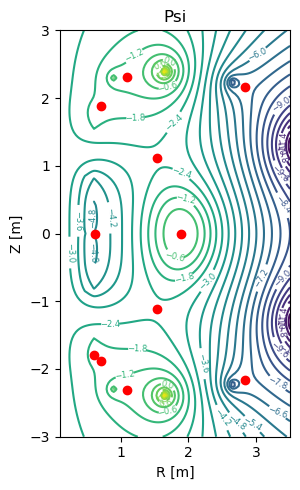

In [7]:
xx, yy = gedsk.get_meshgrid_for_psi(data)
gedsk.plotPoints_on_psi_contour(psi, xx, yy, points=all_critical_points)

In [8]:
wall_file = r"C:\Users\fuadh\Downloads\1_g_p45091_t0.40000\wallcurve.txt"
with open(wall_file, 'r') as f:
    wall_points = f.read()
# read the file as a dataframe it's a csv file with space as delimiter
wall_points = pd.read_csv(wall_file, delimiter=' ', header=None, names=['x', 'y'])
# make each column a numpy array
x = np.array(wall_points['x'])
y = np.array(wall_points['y'])

In [8]:
# find type of critical point for each point
#sorted_points = gedsk.sort_critical_points(all_critical_points, spline, bounds, gedsk.get_wall_points(filename))
sorted_points = gedsk.sort_critical_points(all_critical_points, spline, bounds, None)

sorted_points

{'maximum': [(1.8903014368103017, 7.902851131797367e-06),
  (0.6121715065261123, -1.7956296192233494)],
 'saddle': [(1.541079910623449, -1.1207368358662186),
  (0.7135441512775317, -1.8788391430124474),
  (2.839653136100137, -2.1630629999331794),
  (1.0948002954978469, -2.3083314436254825),
  (2.8395919297995196, 2.1630883688868274),
  (0.7146485744890891, 1.8791860953846318),
  (0.6247812433632787, 3.529545135735609e-07),
  (1.0938947434854356, 2.308122284621542),
  (1.5410375123370792, 1.1207609553236064)]}

In [12]:
import matplotlib.pyplot as plt

In [9]:
lims = gedsk.get_wall_points(filename)

No wall points found: LIMITR tag not found in C:\Users\fuadh\Downloads\geqdskV2-FreeGS-20200401


In [10]:
lims = data['rlim'], data['zlim']

No wall points found: LIMITR tag not found in C:\Users\fuadh\Downloads\geqdskV2-FreeGS-20200401
No wall points found in C:\Users\fuadh\Downloads\geqdskV2-FreeGS-20200401


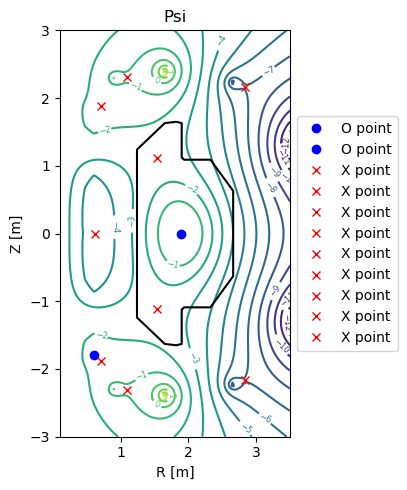

In [13]:
fig, ax = gedsk.plot_sorted_points_with_contour_with_wall(psi, xx, yy, sorted_points, filename)
ax.plot(lims[0], lims[1], 'k')
plt.show()

In [16]:
# create a function to plot all the separatrix curves
def plot_separatrix_curves(spline, sorted_points, xx, yy, psi):
    psi_values = []
    for xpoint in sorted_points['saddle']:
        # get the flux value of the saddle point
        psi_value = spline(xpoint[0], xpoint[1])
        psi_values.append(psi_value[0][0])
    
    psi_values = np.sort(psi_values)
    # plot the psi contour with psi values as levels
    fig, ax = plt.subplots()
    # plot the psi contour with spline
    ax.contour(xx, yy, psi, levels=psi_values)

    # get the x points and o points to plot
    x_points = sorted_points['saddle']


    # make x point two list of points of x coordinate and y coordinate
    x_points_x = [x[0] for x in x_points]; x_points_y = [x[1] for x in x_points]
    x_points = [x_points_x, x_points_y]
    # make o point two list of points of x coordinate and y coordinate
    #o_points_x = [x[0] for x in o_points]; o_points_y = [x[1] for x in o_points]
    #o_points = [o_points_x, o_points_y]

    # plot the x points and o points
    ax.plot(x_points[0], x_points[1], 'rx', label='x points')
    #ax.plot(o_points[0], o_points[1], 'bo', label='o points')
    # equal aspect ratio
    ax.set_aspect('equal')
    # legend outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return fig, ax




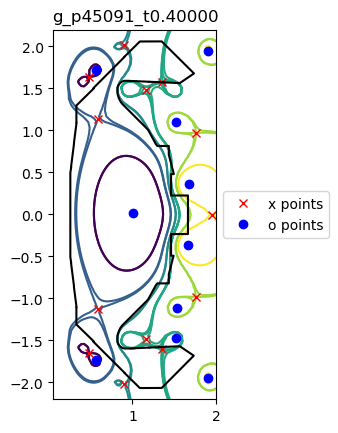

In [27]:
fig, ax = plot_separatrix_curves(spline, sorted_points, xx, yy, psi)
ax.plot(x, y, 'k')
ax.title.set_text("g_p45091_t0.40000")
plt.show()

In [14]:
# get the sorted points for the separatrix curves using the wall information
sorted_points_with_wall = gedsk.sort_critical_points(all_critical_points, spline, bounds, lims=lims)


In [20]:
sorted_points_with_wall

{'maximum': [(1.8903014368103017, 7.902851131797367e-06)],
 'saddle': [(1.541079910623449, -1.1207368358662186),
  (1.5410375123370792, 1.1207609553236064)],
 'out_of_wall': [(0.7135441512775317, -1.8788391430124474),
  (2.839653136100137, -2.1630629999331794),
  (1.0948002954978469, -2.3083314436254825),
  (2.8395919297995196, 2.1630883688868274),
  (0.7146485744890891, 1.8791860953846318),
  (0.6247812433632787, 3.529545135735609e-07),
  (1.0938947434854356, 2.308122284621542),
  (0.6121715065261123, -1.7956296192233494)]}

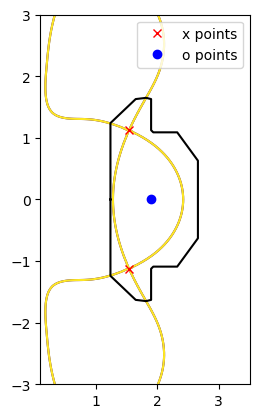

In [23]:
fig, ax = plot_separatrix_curves(spline, sorted_points_with_wall, xx, yy, psi)
ax.plot(lims[0], lims[1], 'k')
# plot the o point too
o_points = sorted_points_with_wall['maximum'][0]
ax.plot(o_points[0], o_points[1], 'bo', label='o points')
#ax.title.set_text("g_p45091_t0.40000")
ax.legend()
# export the plot to a file with high resolution
plt.savefig('download/usmanbhai_separatrix_curves_with_wall.png', dpi=300)
plt.show()